## Porównywanie obrazów przy pomocy histogramów

Napisz metodę, która porównuje dwa obrazy przy pomocy histogramów. Metoda powinna zwracać wartość z zakresu [0, b] gdzie 0 < b. Im mniejsza wartość tym bardziej podobne histogramy, a co za tym idzie, istnieje duża szansa, że dwa obrazy są podobne albo identyczne.

Uwaga: Możesz zmodyfikować jedynie metodę `compare_histograms`.

In [20]:
import numpy as np
from skimage import data 

img1 = data.camera()
img2 = data.coins()
img3 = np.roll(img1, (4, 4))
img4 = np.rot90(img1)
img5 = np.flip(img1, axis=0)
img6 = np.flip(img1, axis=1)
img7 = np.clip(img1 + np.random.randint(-50, 50, img1.shape), 0, 255).astype(np.uint8)

def compare_histogram(x: np.ndarray, y: np.ndarray, bins: int = 256) -> float:
    pass 
    hist_x, _ = np.histogram(x.flatten(), bins=bins, range=(0, 256), density=True)
    hist_y, _ = np.histogram(y.flatten(), bins=bins, range=(0, 256), density=True)
    
    diff_images = np.linalg.norm(hist_x - hist_y)
    return diff_images

    
assert compare_histogram(img1, img2) > 0
assert compare_histogram(img1, img3) == 0
assert compare_histogram(img1, img4) == 0
assert compare_histogram(img1, img5) == 0
assert compare_histogram(img1, img6) == 0
assert compare_histogram(img1, img7) > 0


## Dopasowywanie histogramu
Dokonaj dopasowywanie histogramu za pomocą funkcji `match_histograms`. 

Wyświetl obraz oryginalny, obraz referencyjny oraz obraz po dopasowaniu histogramu.

Ustaw rozmiar figury: 12x4. 

Wykorzystaj `tight_layout`.

Ustaw czcionkę na `cursive`.

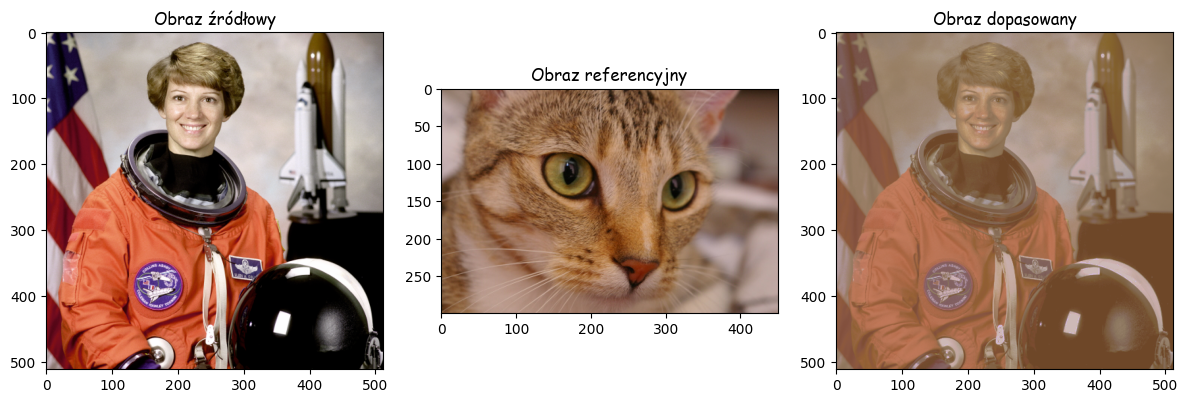

In [16]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import match_histograms

reference = data.chelsea()
image = data.astronaut()

# umieść swoje rozwiązanie tutaj

matched =  match_histograms(image,reference,channel_axis = -1)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Obraz źródłowy",fontdict={'fontname': 'cursive'})
plt.imshow(image)

plt.subplot(1,3,2)

plt.title("Obraz referencyjny",fontdict={'fontname': 'cursive'})
plt.imshow(reference)

plt.subplot(1,3,3)

plt.title("Obraz dopasowany",fontdict={'fontname': 'cursive'})
plt.imshow(matched)
plt.tight_layout()
plt.show()

## Wyrównywanie histogramu w oknach

Napisz metodę, która wyrównuje histogram obrazu w oknach o rozmiarze `window_size`.

Pamiętaj o zakresie wartości pikseli w obrazie - [0, 255] vs. [0, 1].

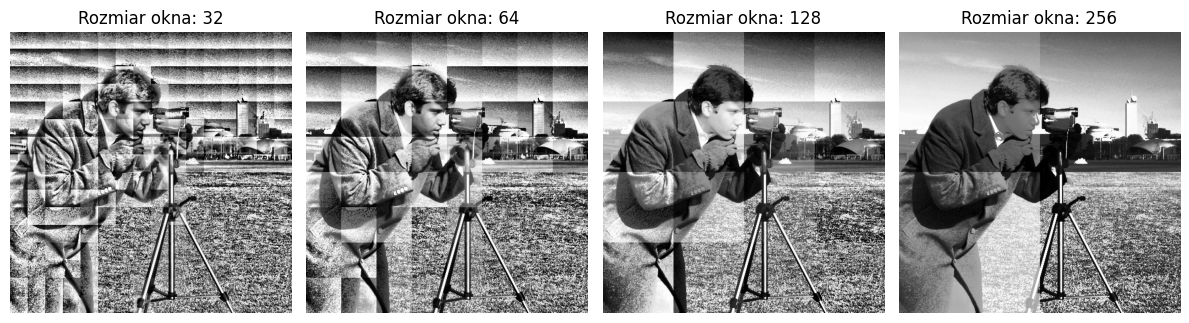

In [5]:
from typing import List
import numpy as np
from skimage import data 
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks

def equalize_hist_in_windows(img: np.ndarray, window_size: int, bins: int = 256) -> np.ndarray:
    # umieść swoje rozwiązanie tutaj
    height, width = img.shape
    img_padded = np.pad(img, ((0, window_size - height % window_size), (0, window_size - width % window_size)), mode='constant') 
    res = np.zeros_like(img_padded)
    blocks = view_as_blocks(img_padded, block_shape=(window_size, window_size))
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            block = blocks[i, j]
            equalized_block = equalize_hist(block)  
            res[i*window_size:(i+1)*window_size, j*window_size:(j+1)*window_size] = equalized_block * 255
    return res[:height, :width]


images: List[np.ndarray] = []
window_sizes = [32, 64, 128, 256]
for window_size in window_sizes:
    img = equalize_hist_in_windows(data.camera(), window_size)
    images.append(img)

plt.subplots(1, 4, figsize=(12, 4))
for i, (img, window_size) in enumerate(zip(images, window_sizes)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Rozmiar okna: {window_size}')
plt.tight_layout()
plt.show()
